In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
%matplotlib inline

### Random하게 값 생성

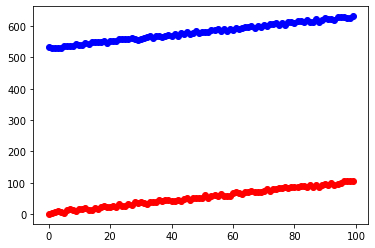

In [3]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 3))
    y = np.zeros(shape = numPoints)
    
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i     # X1
        x[i][1] = random.uniform(0, 1) * variance + i     # X2
        x[i][2] = 1                                       # X0
        
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias(절편) of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, :1], 'ro')
plt.plot(y, 'bo')
plt.show()

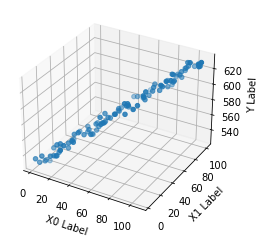

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:, 0], x[:, 1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [5]:
def compute_cost(x, y, theta):
    '''
    Compute cost for linear regression
    '''
    # Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)
    
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    
    return J

In [6]:
def minimize_gradient(x, y, theta, iterations = 100000, alpha = 0.01):
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):
        predictions = x.dot(theta)
        
        for n in range(theta.size):       # features 개수만큼
            partial_marginal = x[:, n]     # Xn의 값
            errors_xn = (predictions - y) * partial_marginal
            theta[n] = theta[n] - alpha * (1.0 / m) * errors_xn.sum()   # Gradient
            
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))
            
    return theta, np.array(cost_history), np.array(theta_history)

In [7]:
theta_initial = np.ones(3)    # theta initializes to 1

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 300000, 0.0001)
print("theta", theta)         # w1, w2, w0

theta [5.74276018e-01 4.24496129e-01 5.25993869e+02]


### sklearn 패키지 이용

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()   # Normal Equation으로 구해짐
regr.fit(x[:, :2], y)

# The coefficients
print('Coefficients: ', regr.coef_)      # w1, w2
print('intercept: ', regr.intercept_)

Coefficients:  [0.57477059 0.41418187]
intercept:  526.6736793493142


### Prediction

In [9]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10, :2].reshape(1, 2)))

541.071423309012
[541.63166324]


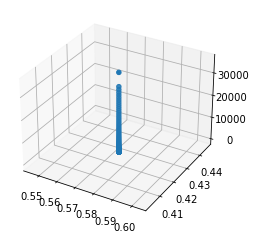

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(theta_history[:, 0], theta_history[:, 1], cost_history, zdir = 'z')
plt.show()

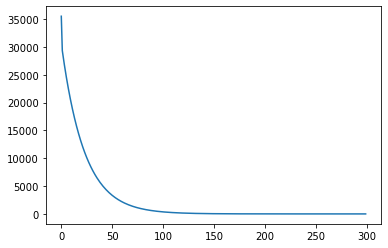

In [11]:
plt.plot(cost_history)
plt.show()